In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
d.keys()

dict_keys(['Resources', 'TomQuality', 'CropParameters', 'LabAnalysis', 'Production', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
grodansens=d['GrodanSens']

In [5]:
grodansens.shape

(286854, 7)

In [6]:
grodansens.dtypes

%time       float64
EC_slab1     object
EC_slab2     object
WC_slab1     object
WC_slab2     object
t_slab1      object
t_slab2      object
dtype: object

In [7]:
grodansens.nunique()

%time       47809
EC_slab1       53
EC_slab2       55
WC_slab1      451
WC_slab2      525
t_slab1       201
t_slab2       197
dtype: int64

In [8]:
#View the data
grodansens.head()

,%time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
0,43815.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,43815.00347,NaN,NaN,NaN,NaN,NaN,NaN
2,43815.00694,NaN,NaN,NaN,NaN,NaN,NaN
3,43815.01042,NaN,NaN,NaN,NaN,NaN,NaN
4,43815.01389,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
grodansens.columns

Index(['%time', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1',
       't_slab2'],
      dtype='object')

In [10]:
#Basic information
grodansens.info()
#Describe the data
grodansens.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286854 entries, 0 to 286853
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   %time     286854 non-null  float64
 1   EC_slab1  286854 non-null  object 
 2   EC_slab2  286854 non-null  object 
 3   WC_slab1  286854 non-null  object 
 4   WC_slab2  286854 non-null  object 
 5   t_slab1   286854 non-null  object 
 6   t_slab2   286854 non-null  object 
dtypes: float64(1), object(6)
memory usage: 15.3+ MB


,%time
count,286854.000000
mean,43898.000000
std,47.921158
min,43815.000000
25%,43856.500000
50%,43898.000000
75%,43939.500000
max,43981.000000


In [11]:
for col in grodansens.columns:
    grodansens[col] = grodansens[col].astype(float)

In [12]:
#Find NaN values
grodansens.isna().sum()

%time           0
EC_slab1    13889
EC_slab2    13889
WC_slab1    13889
WC_slab2    13889
t_slab1     13889
t_slab2     13889
dtype: int64

In [13]:
#as the NaN value is very small as compared to the given data so we drop the null row 
grodansens.dropna(inplace=True)

In [14]:
#renaming
grodansens.rename(columns={'%time': 'Time'}, inplace=True)
grodansens.head()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
156,43815.54167,4.4,4.7,91.6,94.1,22.1,21.9
393,43816.36458,4.6,4.8,90.7,93.0,15.7,15.7
394,43816.36806,4.6,4.8,90.7,93.3,15.8,15.8
395,43816.37153,4.5,4.8,90.8,93.0,15.9,15.8
396,43816.37500,4.5,4.8,90.8,93.2,15.9,15.9


In [15]:
#changing time format
grodansens['Time'] = pd.to_datetime(grodansens['Time'], unit='D', origin='1899-12-30')

In [16]:
grodansens.head()

,Time,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
156,2019-12-16 13:00:00.288000000,4.4,4.7,91.6,94.1,22.1,21.9
393,2019-12-17 08:44:59.712000000,4.6,4.8,90.7,93.0,15.7,15.7
394,2019-12-17 08:50:00.384000000,4.6,4.8,90.7,93.3,15.8,15.8
395,2019-12-17 08:55:00.191999744,4.5,4.8,90.8,93.0,15.9,15.8
396,2019-12-17 09:00:00.000000000,4.5,4.8,90.8,93.2,15.9,15.9


<ipython-input-17-c7d3f8aba372>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(grodansens.corr(), annot=True)


<AxesSubplot:>

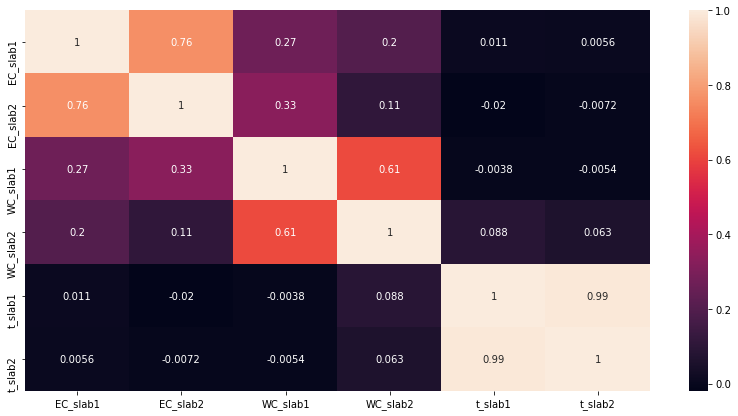

In [17]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(grodansens.corr(), annot=True)

In [18]:
correlations = grodansens.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

EC_slab1 and EC_slab2 correlated with value 0.7645546880795824
EC_slab2 and EC_slab1 correlated with value 0.7645546880795824
WC_slab1 and WC_slab2 correlated with value 0.6136444026151693
WC_slab2 and WC_slab1 correlated with value 0.6136444026151693
t_slab1 and t_slab2 correlated with value 0.9910839024922912
t_slab2 and t_slab1 correlated with value 0.9910839024922912


<ipython-input-18-f37c443bebe8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = grodansens.corr()


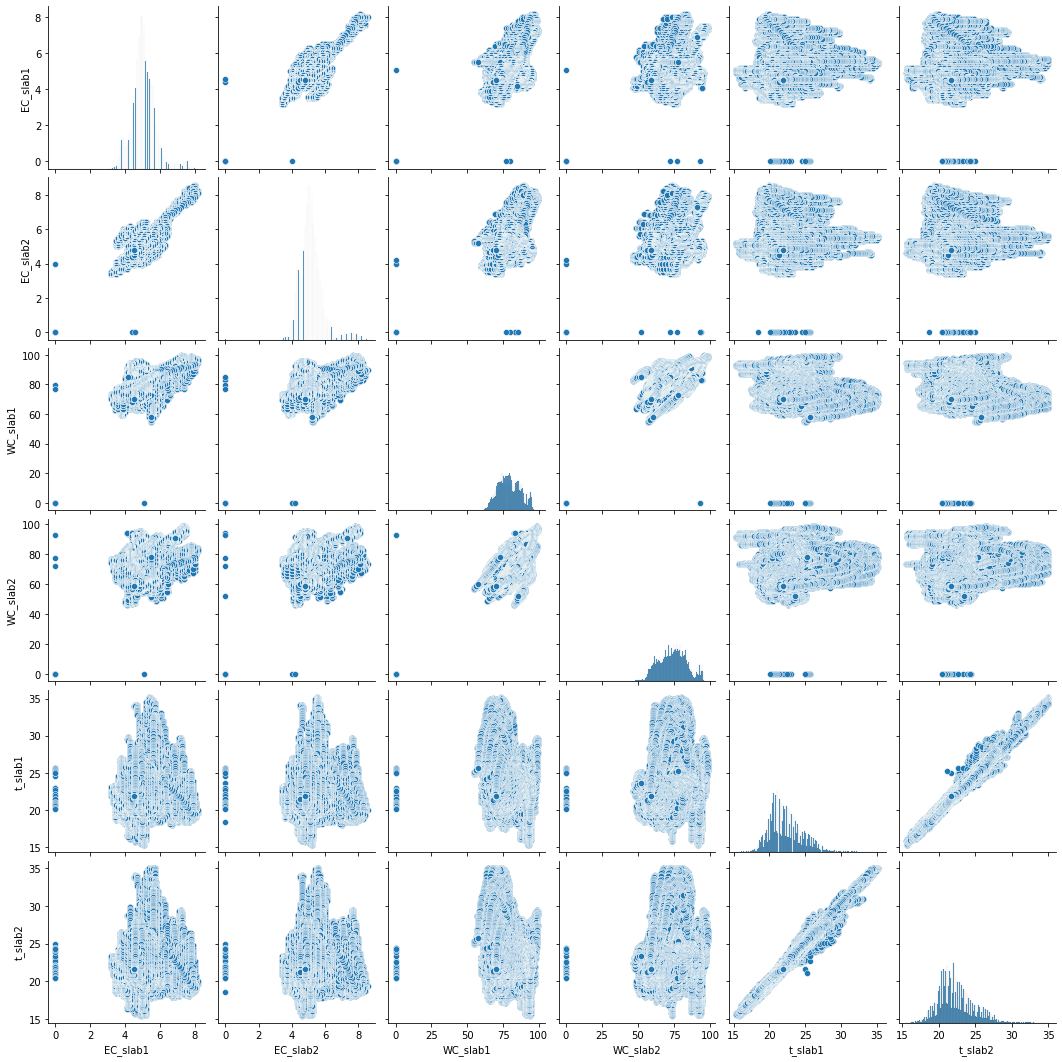

In [19]:
sns.pairplot(grodansens)

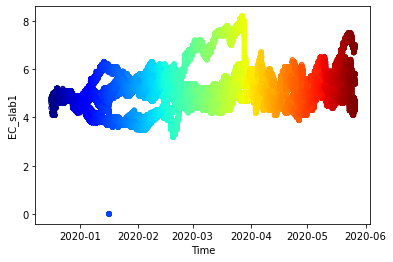

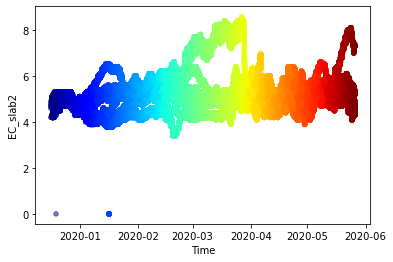

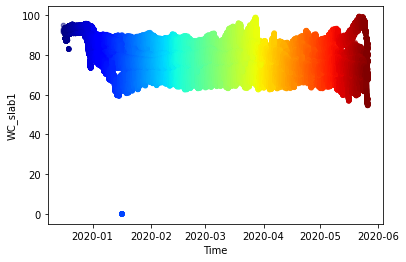

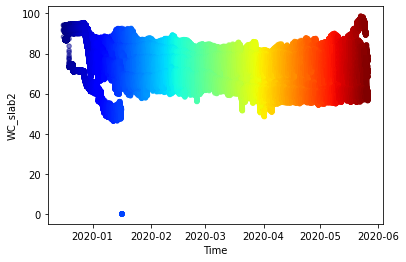

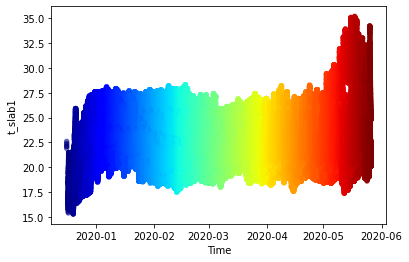

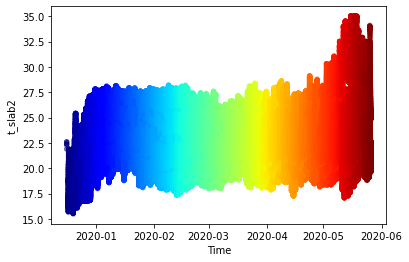

In [20]:
#scatter plot with respect to time 
columns=['EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1','t_slab2']
for i in columns:
    grodansens.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))